In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

# Comparisons with arrays

In [2]:
pets = make_array('cat', 'cat', 'dog', 'cat', 'dog', 'rabbit')

In [3]:
pets == 'cat'

array([ True,  True, False,  True, False, False], dtype=bool)

In [4]:
sum(make_array(True, True, False, True, False, False))

3

In [5]:
sum(pets == 'dog')

2

In [6]:
np.count_nonzero(pets == 'dog')

2

In [7]:
x = np.arange(20, 31)
x

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [8]:
x > 28

array([False, False, False, False, False, False, False, False, False,
        True,  True], dtype=bool)

In [9]:
sum(x > 28)

2

# Rows & Apply

In [11]:
survey = Table.read_table('welcome_survey_fa22.csv')
survey.show(3)

Year,Extroversion,Number of textees,Hours of sleep,Handedness,Pant leg,Sleep position,Pets,Piercings
Second,4,15,7,Right-handed,Left leg in first,On your right side,Bird,6
First,9,6,7.5,Right-handed,Left leg in first,On your left side,Bird,2
First,8,9,7,Right-handed,Right leg in first,On your right side,Bird,2


In [12]:
r = survey.row(0)
r

Row(Year='Second', Extroversion=4, Number of textees=15, Hours of sleep=7.0, Handedness='Right-handed', Pant leg='Left leg in first', Sleep position='On your right side', Pets='Bird', Piercings=6)

In [13]:
r.item(0)

'Second'

In [14]:
r.item('Year')

'Second'

In [ ]:
# You can't add the row, there are some numbers and String thats why there is an error

sum(survey.row(0))

NameError: name 'survey' is not defined

In [16]:
survey.select(1, 2, 3).row(2)

Row(Extroversion=8, Number of textees=9, Hours of sleep=7.0)

In [17]:
np.average(survey.select(1, 2, 3).row(2))

8.0

In [18]:
p = survey.pivot(6, 3)
p

Hours of sleep,On your back,On your left side,On your right side,On your stomach
3,0,1,1,0
4,10,2,7,1
4.5,0,1,0,0
5,10,23,26,5
5.5,0,1,1,1
6,63,97,94,51
6.25,1,0,0,0
6.5,2,13,6,3
7,149,176,198,95
7.5,17,7,10,3


In [19]:
p.drop(0).apply(sum)

array([  2,  20,   1,  64,   3, 305,   1,  24, 618,  37, 394,  12,  37,
         7,   1,   1])

In [20]:
p.with_column('Total', p.drop(0).apply(sum)).show()

Hours of sleep,On your back,On your left side,On your right side,On your stomach,Total
3,0,1,1,0,2
4,10,2,7,1,20
4.5,0,1,0,0,1
5,10,23,26,5,64
5.5,0,1,1,1,3
6,63,97,94,51,305
6.25,1,0,0,0,1
6.5,2,13,6,3,24
7,149,176,198,95,618
7.5,17,7,10,3,37


# Simulation of Random Selections

## Random Selection

In [22]:
mornings = make_array('wake up', 'sleep in')

In [27]:
np.random.choice(mornings)

'wake up'

In [24]:
np.random.choice(mornings)

'wake up'

In [28]:
np.random.choice(mornings)

'sleep in'

We can also pass an argument that specifies how many times to make a random choice:

In [29]:
np.random.choice(mornings, 7)

array(['wake up', 'wake up', 'wake up', 'wake up', 'wake up', 'wake up',
       'wake up'],
      dtype='<U8')

In [30]:
sum(np.random.choice(mornings, 7) == 'wake up')

2

In [31]:
sum(np.random.choice(mornings, 7) == 'sleep in')

2

In [32]:
morning_week = np.random.choice(mornings, 7)
morning_week

array(['sleep in', 'sleep in', 'sleep in', 'wake up', 'sleep in',
       'sleep in', 'sleep in'],
      dtype='<U8')

In [33]:
sum(morning_week == 'wake up')

1

In [37]:
sum(morning_week == 'sleep in')

6

## A Game

Let's play a game: we each roll a die. 

If my number is bigger: I get 1 point.

If they're the same: we get nothing.

If your number is bigger: you get 1 point.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how many points we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

### Computing Points

In [38]:
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1
    elif your_roll > my_roll:
        return -1
    else:
        return 0

In [39]:
one_round(1, 1)

0

In [40]:
one_round(6, 5)

1

In [41]:
one_round(7, -1)

1

### Simulating the roll of a die

In [42]:
die_faces = np.arange(1, 7)
die_faces

array([1, 2, 3, 4, 5, 6])

In [43]:
np.random.choice(die_faces)

6

In [44]:
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)
    return one_round(my_roll, your_roll)

In [45]:
simulate_one_round()

-1

## Appending Arrays

In [46]:
first = np.arange(4)
second = np.arange(10, 17)

In [47]:
np.append(first, 6)

array([0, 1, 2, 3, 6])

In [48]:
first

array([0, 1, 2, 3])

In [49]:
np.append(first, second)

array([ 0,  1,  2,  3, 10, 11, 12, 13, 14, 15, 16])

In [50]:
first

array([0, 1, 2, 3])

In [51]:
second

array([10, 11, 12, 13, 14, 15, 16])

In [52]:
results = make_array()

In [53]:
results = np.append(results, simulate_one_round())
results

array([ 0.])

In [54]:
results = np.append(results, simulate_one_round())
results

array([ 0., -1.])

## Simulation: Repeated Betting ###

In [55]:
game_outcomes = make_array()

for i in np.arange(5):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

array([ 0.,  0., -1.,  0.,  0.])

In [56]:
game_outcomes = make_array()

for i in np.arange(10000):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

array([-1., -1., -1., ..., -1.,  1., -1.])

In [57]:
len(game_outcomes)

10000

In [58]:
results = Table().with_column('My winnings', game_outcomes)
results

My winnings
-1
-1
-1
1
-1
-1
-1
0
1
-1


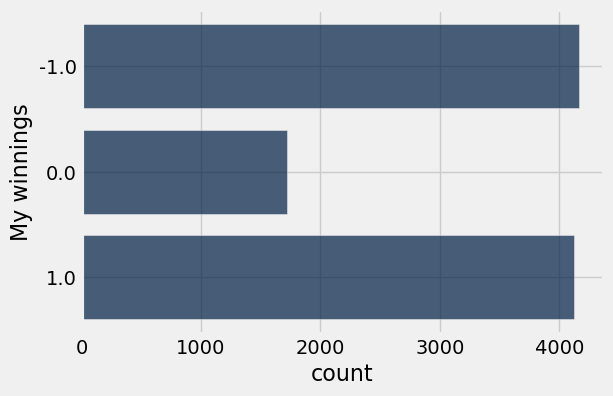

In [59]:
results.group('My winnings').barh('My winnings')

### Another example: simulating heads in 100 coin tosses

In [60]:
coin = make_array('head', 'tail')

In [65]:
sum(np.random.choice(coin, 100) == 'head')

57

In [66]:
# Simulate one outcome

def num_heads():
    return sum(np.random.choice(coin, 100) == 'head')

In [67]:
# Decide how many times you want to repeat the experiment

repetitions = 50000

In [68]:
# Simulate that many outcomes

outcomes = make_array()

for i in np.arange(repetitions):
    outcomes = np.append(outcomes, num_heads())

outcomes

array([ 58.,  59.,  47., ...,  51.,  50.,  48.])

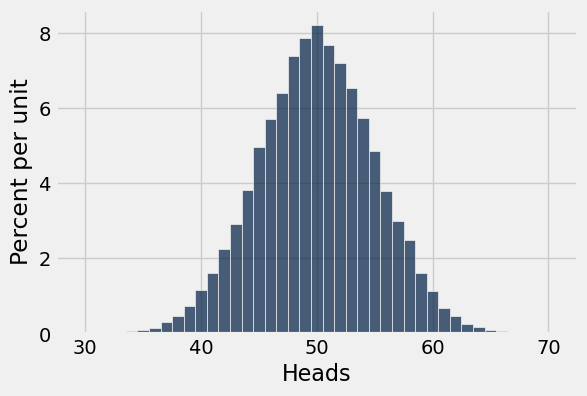

In [69]:
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(29.5, 70.6))
#heads.hist(bins = np.arange(100))